<a href="https://colab.research.google.com/github/rohailkhan/Apps-in-Shiny/blob/master/minst_data_losses_%26_accuracy_(call_backs_etc).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets
# Loading MNIST dataset.
# verify
# You can verify that the split between train and test is 60,000, and
#10,000 respectively.
# Labels have one-hot representation.is automatically applied
mnist = datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# X_train is 60000 rows of 28x28 values; we --> reshape it to
# 60000 x 784.
X_train=X_train.reshape(60000,(28*28))
X_test=X_test.reshape(10000,(28*28))
from tensorflow.keras.utils import to_categorical
NB_CLASSES = 10 # number of outputs = number of digits
#One-hot representation of the labels.
y_train = to_categorical(y_train, NB_CLASSES)
y_test = to_categorical(y_test, NB_CLASSES)
model=Sequential()
model.add(Dense(NB_CLASSES,input_shape=(784,),activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',  metrics=['accuracy'])

In [0]:
history=model.fit(X_train,y_train,epochs=60,validation_data=(X_test,y_test),verbose=0)

In [0]:
## check if the model is overfitting by plotting
def plot_accuracy(acc,val_acc):
    plt.figure()
    plt.plot(acc,color='red')
    plt.plot(val_acc,color='green')
    plt.legend(['Train','Test'])
    plt.xlabel('EPOCH')
    plt.ylabel('Accuracy')
    plt.show()

In [0]:
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss,color='red')
    plt.plot(val_loss,color='green')
    plt.xlabel('EPOCHS')
    plt.ylabel('LOSS')
    plt.legend(['Training' ,'Testing'])
    plt.show()

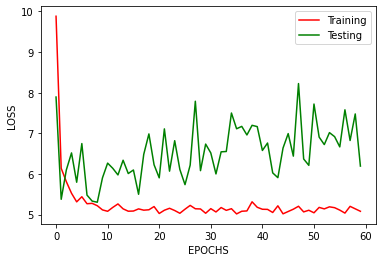

In [8]:
plot_loss(history.history['loss'],history.history['val_loss'])

In [23]:
for key in history.history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


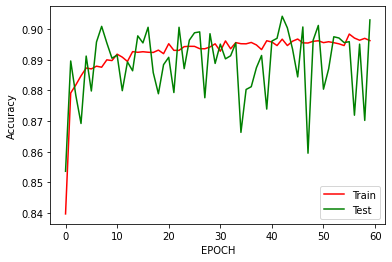

In [24]:
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

In [0]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [0]:
best_model=ModelCheckpoint('best_digits_model.hdf5',save_best_only=True)

In [0]:
model=Sequential()
model.add(Dense(NB_CLASSES,input_shape=(784,),activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',  metrics=['accuracy'])

In [0]:
history1=model.fit(X_train,y_train,epochs=10000,validation_data=(X_test,y_test),callbacks=[early_stop,best_model],verbose=0)


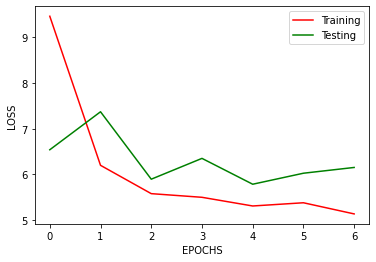

In [50]:
plot_loss(history1.history['loss'],history1.history['val_loss'])

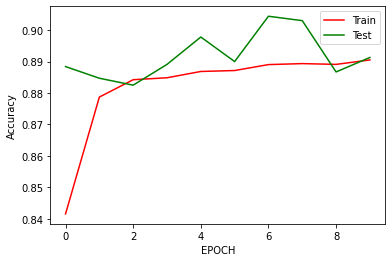

In [46]:
plot_accuracy(history1.history['accuracy'], history1.history['val_accuracy'])